In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/fart-recordings-dataset/fart_dataset/611.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/3845.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/1591.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/3099.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/2646.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/4496.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/3263.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/364.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/5048.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/5297.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/367.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/5580.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/2750.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/5713.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/5170.wav
/kaggle/input/fart-recordings-dataset/fart_dataset/3480.wav
/kaggle/input/fart-recordings-dataset/fart_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from pydub import AudioSegment
import tensorflow as tf

import librosa
import librosa.display
from IPython import display

2024-09-23 10:14:24.446945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 10:14:24.447110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 10:14:24.598235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
audio_files = glob("/kaggle/input/fart-recordings-dataset/fart_dataset/*.wav")

2024-08-06 13:14:19.136257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 13:14:19.136371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 13:14:19.269056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:

y, sr = librosa.load(audio_files[0])

In [6]:
print("Type: ", type(y))
print("Shape: ", y.shape)
y

Type:  <class 'numpy.ndarray'>
Shape:  (118261,)


array([ 5.6843419e-13, -1.3642421e-12,  4.5474735e-13, ...,
       -6.4853474e-04, -5.9091824e-04, -7.5626891e-04], dtype=float32)

In [7]:
display.Audio(audio_files[0])

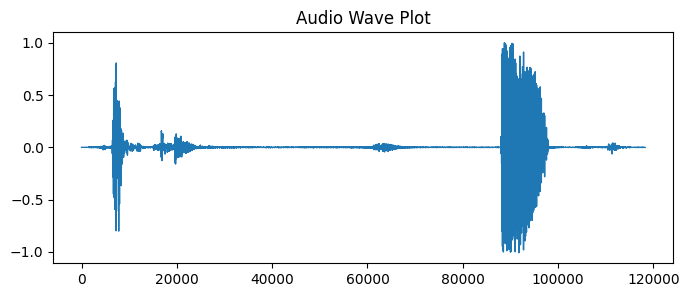

In [8]:
pd.Series(y).plot(figsize = (8, 3), lw = 1)
plt.title("Audio Wave Plot")
plt.show()

In [9]:
np.argmax(pd.Series(y))

88724

SyntaxError: incomplete input (2836319883.py, line 2)

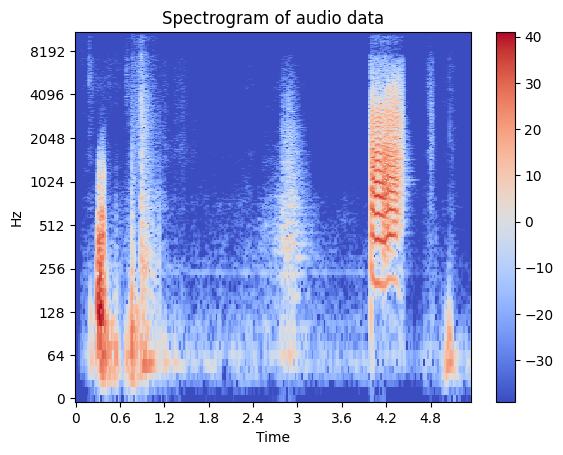

In [11]:
transformed_y = librosa.stft(y)
db = librosa.amplitude_to_db(abs(transformed_y))
db.shape

image = librosa.display.specshow(db, sr = sr, x_axis = "time", y_axis = "log")
plt.colorbar(image)
plt.title("Spectrogram of audio data")
plt.show()

In [12]:
db

array([[-38.996773, -38.996773, -38.996773, ..., -36.09255 , -38.996773,
        -34.99857 ],
       [-38.996773, -38.996773, -38.996773, ..., -30.358303, -30.525198,
        -26.22842 ],
       [-38.996773, -38.996773, -38.996773, ..., -21.387173, -13.784931,
        -13.568736],
       ...,
       [-38.996773, -38.996773, -38.996773, ..., -38.996773, -38.996773,
        -38.996773],
       [-38.996773, -38.996773, -38.996773, ..., -38.996773, -38.996773,
        -38.996773],
       [-38.996773, -38.996773, -38.996773, ..., -38.996773, -38.996773,
        -38.996773]], dtype=float32)

In [13]:
bg_files = glob("/kaggle/input/ambient-noise/*.wav")

In [14]:
_, data = wavfile.read("/kaggle/input/ambient-noise/*.wav")

NameError: name 'wavfile' is not defined

In [ ]:
def make_backgr_right_length(bg, len_bg_short):
    
    start = np.random.randint(low=0, high=len(bg)-len_bg_short)
    end = start+len_bg_short
    new_bg = bg[start : end]
    return new_bg
    
    

In [15]:
def get_random_time_segment(fart, len_bg):
    
    
    segment_start = np.random.randint(0, len_bg-len(fart))   # Make sure segment doesn't run past the 10sec background 
    segment_end = segment_start + len(fart) - 1
    
    return segment_start

In [16]:
def insert_audio_clip(background, audio_clip):
    segment_ms = len(audio_clip)
    
    segment_time = get_random_time_segment(segment_ms, len(background))
    
    new_background = background[0].overlay(audio_clip, position = segment_time[0])
    
    
    return new_background, segment_time

In [17]:
bg_files[4]
y, sr = librosa.load(bg_files[0])

In [18]:

t = make_backgr_right_length(y, 10000)

NameError: name 'make_backgr_right_length' is not defined

In [19]:
sr1=44100
dur = 15

bg_files[4]
y, sr = librosa.load(bg_files[4], sr=44100, duration=15)
len_bg = len(y)

Audio(data=y, rate=sr)
len(y)

NameError: name 'Audio' is not defined

In [20]:
back = librosa.load(bg_files[2], sr=sr1,duration = dur )
ba = make_backgr_right_length(back[0], 300000, len(back[0]))

audio = librosa.load(audio_files[6], sr=sr1)

new_bg, st = insert_audio_clip(ba, audio[0])


n = background.overlay(audio)

NameError: name 'make_backgr_right_length' is not defined

In [21]:


audio_long = np.zeros((len(ba)))
(audio_long)
r = get_random_time_segment(len(audio[0]), len(ba))

for i in range(len(audio[0])):
    audio_long[i+r] = audio[0][i]

NameError: name 'ba' is not defined

In [22]:
samen = audio_long+ba


NameError: name 'audio_long' is not defined

In [23]:
#from pydub import AudioSegment
#from pydub.playback import play

#sound1 = AudioSegment.from_file(bg_files[2])
#sound2 = AudioSegment.from_wav("quieter_output.wav")

#overlay = sound1.overlay(sound2, position=1000)

#play(overlay)
#overlay.export("overlaid_1sec_offset.wav", format="wav")

In [24]:
#from pydub import AudioSegment
#from pydub.playback import play

#sound1 = AudioSegment.from_wav(bg_files[2], "wav")


In [25]:
sr1 = (44100)
dur = 10
sec = 6


data_withfart = []
withfart_pxx = []
mfccs_withfart = []
for i in range(150):
    
    rand_envi = np.random.randint(0, 21)
    background_long = librosa.load(bg_files[rand_envi], sr=sr1, duration = dur)
    back_cut = make_backgr_right_length(background_long[0], sec*sr1)
    #print(i)
    #print(rand_envi)
    fart = librosa.load(audio_files[i], sr = sr1)
    fart_long = np.zeros((len(back_cut)))
    fart = fart[0]
    if len(fart)>len(back_cut):
        fart = fart[0:len(back_cut)-1]
        
    r = get_random_time_segment(fart, len(back_cut))
    for i in range(len(fart)):
        fart_long[i+r] = fart[i]
        
    final = back_cut + fart_long
    
    pxx, freqs, bins, im = plt.specgram(final)
    mfccs = librosa.feature.mfcc(y = final, sr=sr1, n_mfcc=40)
    withfart_pxx.append(pxx)
    data_withfart.append(final)
    mfccs_withfart.append(mfccs)
    
    
    
    

NameError: name 'make_backgr_right_length' is not defined

In [26]:
data_nofart = []
nofart_pxx = []
mfccs_nofart = []
for i in range(150):
    
    rand_envi = np.random.randint(0, 21)
    background_long = librosa.load(bg_files[rand_envi], sr=sr1, duration = dur)
    back_cut = make_backgr_right_length(background_long[0], sec*sr1)
    final = back_cut
    pxx, freqs, bins, im = plt.specgram((final))
    mfccs = librosa.feature.mfcc(y = final , sr=sr1, n_mfcc=40)
    nofart_pxx.append(pxx)
    data_nofart.append(final)
    mfccs_nofart.append(mfccs)

NameError: name 'make_backgr_right_length' is not defined

In [27]:
background_longtest, s = librosa.load(bg_files[4], sr=sr1, duration = dur)

In [28]:
np.shape(mfccs_nofart[6])

IndexError: list index out of range

In [29]:
mfccs = librosa.feature.mfcc(y = data_withfart[4], sr=sr1, n_mfcc=40)

IndexError: list index out of range

In [ ]:
np.shape(mfccs)

In [30]:
40*862

34480

In [31]:
fart = librosa.load(audio_files[6], sr = sr1)
display.Audio(data = fart[0], rate = sr1)

In [32]:
input_shape = (X_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


NameError: name 'X_train' is not defined

In [33]:
from IPython.display import Audio

display.Audio(data = data_withfart[40], rate =sr1)

IndexError: list index out of range

In [34]:
data[4]

NameError: name 'data' is not defined

In [35]:
melspec = librosa.feature.melspectrogram(data_withfart[4], sr=sr1, n_mels = 128)
melspec = librosa.power_to_db(melspec).astype(np.float32)

IndexError: list index out of range

In [36]:
data_withfart[4]

IndexError: list index out of range

In [37]:
pxx, freqs, bins, im = plt.specgram(data_withfart[4])

IndexError: list index out of range

In [38]:
plt.plot(pxx)

NameError: name 'pxx' is not defined

In [39]:
im

NameError: name 'im' is not defined

In [40]:
plt.plot(pxx)

NameError: name 'pxx' is not defined

In [41]:
plt.plot(freqs)

NameError: name 'freqs' is not defined

In [42]:
noise_files = glob("/kaggle/input/urbansound8k/fold1/*.wav")
nf2 = glob("/kaggle/input/urbansound8k/fold7/*.wav")
nf3 = glob("/kaggle/input/urbansound8k/fold4/*.wav")
nf4 = glob("/kaggle/input/urbansound8k/fold9/*.wav")
nf5 = glob("/kaggle/input/urbansound8k/fold6/*.wav")


In [43]:
noise_files += (nf2 + nf3 + nf4 + nf5)

In [44]:
sr1 = (44100)
dur = 10
sec = 6


data_withnoise = []
withnoise_pxx = []
mfcc_noise = []
for i in range(150):
    
    rand_envi = np.random.randint(0, 21)
    background_long = librosa.load(bg_files[rand_envi], sr=sr1, duration = dur)
    back_cut = make_backgr_right_length(background_long[0], sec*sr1)
    #print(i)
    #print(rand_envi)
    rand_noisefile = np.random.randint(0, len(noise_files))
    noise = librosa.load(noise_files[rand_noisefile], sr = sr1)
    noise_long = np.zeros((len(back_cut)))
    noise = noise[0]
    if len(noise)>len(back_cut):
        noise = noise[0:len(back_cut)-1]
        
    r = get_random_time_segment(noise, len(back_cut))
    for i in range(len(noise)):
        noise_long[i+r] = noise[i]
        
    final_noise = back_cut + noise_long
    
    pxx, freqs, bins, im = plt.specgram(final_noise)
    mfccs = librosa.feature.mfcc(y = final_noise, sr=sr1, n_mfcc=40)
    withnoise_pxx.append(pxx)
    data_withnoise.append(final_noise)
    mfcc_noise.append(mfccs)
    
    
    

NameError: name 'make_backgr_right_length' is not defined

In [45]:
from IPython.display import Audio

display.Audio(data = data_withnoise[49], rate =sr1)

IndexError: list index out of range

In [46]:
display.Audio(data = data_withfart[67], rate = sr1)

IndexError: list index out of range

In [47]:
import torch
from torchaudio import transforms as AT
from torchvision import transforms as IT
     
# Calculate and show a spectrogram for our generated audio sample using torchaudio
spec_transform = AT.Spectrogram(power=10)
spectrogram = spec_transform(torch.tensor(data_withfart[67]))
print(spectrogram.min(), spectrogram.max())
log_spectrogram = spectrogram.log()
plt.imshow(log_spectrogram);

IndexError: list index out of range

In [ ]:
pxx, freqs, bins, im = plt.specgram((data_withfart[67]))

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

In [49]:
def modelf(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    ### START CODE HERE ###
    
    # Step 1: CONV layer (≈4 lines)
    # Add a Conv1D with 196 units, kernel size of 15 and stride of 4
    X = Conv1D(filters=196, kernel_size=15, strides=4)(X_input)
    # Batch normalization
    X = BatchNormalization()(X)
    # ReLu activation
    X = Activation('relu')(X)
    # dropout (use 0.8)
    X = Dropout(rate=0.8)(X)                                  
                                
    
    # Step 4: Time-distributed dense layer (≈1 line)
    # TimeDistributed  with sigmoid activation 
    X = TimeDistributed(Dense(1, activation='sigmoid'))(X)

    ### END CODE HERE ###

    model = Model(inputs = X_input, outputs = X)
    
    return model  

In [50]:
model = modelf(input_shape = pxx.shape)

NameError: name 'pxx' is not defined

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(, labels_onehot, test_size=0.2, random_state=42, stratify=labels_onehot)


SyntaxError: invalid syntax (3881977259.py, line 2)

In [52]:
full_pxx = withfart_pxx + nofart_pxx + withnoise_pxx
full_mfccs = mfccs_withfart + mfccs_nofart + mfcc_noise
full_audio = data_withfart + data_nofart + data_withnoise

In [53]:
data_withnoise[4]

IndexError: list index out of range

In [54]:
full_audio[304]

IndexError: list index out of range

In [55]:
import random
temp = list(zip(full_mfccs, label))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
res1, res2 = list(res1), list(res2)

NameError: name 'label' is not defined

In [56]:
import random
temp = list(zip(full_audio, label))
random.shuffle(temp)
audiores1, audiores2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
audiores1, audiores2 = list(audiores1), list(audiores2)

NameError: name 'label' is not defined

In [57]:
label = []
for i in range(150):
    label.append(1)
for i in range(300):
    label.append(0)


In [58]:

from IPython.display import Audio

display.Audio(data = audiores1[49], rate =sr1)

NameError: name 'audiores1' is not defined

In [59]:
audiores2[49]

NameError: name 'audiores2' is not defined

**MODEL TIME**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(res1, res2, test_size=0.2, random_state=42, stratify=res2)


NameError: name 'res1' is not defined

In [61]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D







In [62]:
le = LabelEncoder()
labels_encoded = le.fit_transform(res2)
labels_onehot = to_categorical(labels_encoded)


NameError: name 'res2' is not defined

In [63]:
len(le.classes_)

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

In [64]:
input_shape = (20680, 1)
model = Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'LabelEncoder' object has no attribute 'classes_'

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
X_train = np.array(X_train)
X_train = X_train.reshape(np.shape(X_train)[0], -1, 1)

X_test = np.reshape(X_test, (np.shape(X_test)[0], -1, 1))
X_test = np.array(X_test)

NameError: name 'X_train' is not defined

In [66]:
X_train.shape

NameError: name 'X_train' is not defined

In [67]:
360*40*517

7444800

In [68]:
def make_predictions(model, le, file_path):
    audio, sample_rate = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    features = mfccs_scaled.reshape(1, mfccs_scaled.shape[0], 1)
    predicted_vector = model.predict(features)
    predicted_class_index = np.argmax(predicted_vector, axis=-1)
    return le.inverse_transform(predicted_class_index)[0]


In [69]:
wandb_table = wandb.Table(columns=["File", "True Label", "Old Prediction", "New Prediction"])

NameError: name 'wandb' is not defined

In [70]:
import wandb
wandb.init(project='audio_classification_using_W&B', entity='enter your entity name here', config={"batch_size": 32, "epochs": 100})


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

In [71]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
y_train_np_bi = to_categorical(y_train_np)

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
y_test_np_bi = to_categorical(y_test_np)

NameError: name 'X_train' is not defined

In [72]:
X_train_np

NameError: name 'X_train_np' is not defined

In [73]:
model.fit(X_train_np, y_train_np, batch_size=32, epochs=5, 
          validation_data=(X_test_np, y_test_np), verbose=1)


NameError: name 'X_train_np' is not defined

In [74]:
y_train_np

NameError: name 'y_train_np' is not defined